# 1) Convert PDF to JPG 

In [13]:
import glob
from pdf2image import convert_from_path
import os
from PIL import Image

# ---------------------------------------------------------------------------

input_path = 'pdf_forms/credit card form pdf/'
output_path = 'jpg_forms/raw_images/'

# ---------------------------------------------------------------------------

!mkdir jpg_forms
!mkdir jpg_forms/raw_images

# ---------------------------------------------------------------------------

pdf_list = glob.glob1(input_path,"*.pdf")
print("There are",len(pdf_list),"pdf files")

# ---------------------------------------------------------------------------

from tqdm import tqdm
j = 0
for i in tqdm(range(len(pdf_list))):
    pages = convert_from_path(input_path+pdf_list[i])
    for page in pages:
        page.save(output_path + 'image_' + str(j).zfill(3) + ".jpg", 'JPEG')
        j+=1
        
print("Successfully converted to jpg images. See the output at",output_path)

# ---------------------------------------------------------------------------

jpg_list = glob.glob1(output_path,"*.jpg")
print("\nThere are", len(jpg_list), "images to be labelled")

# ---------------------------------------------------------------------------

  0%|          | 0/8 [00:00<?, ?it/s]

There are 8 pdf files


100%|██████████| 8/8 [00:11<00:00,  1.48s/it]

Successfully converted to jpg images. See the output at jpg_forms/raw_images/

There are 62 images to be labelled


# 2) Resize JPG dimensions to majority image

In [22]:
rows = []

jpg_list = glob.glob1(output_path,"*.jpg")
for i in tqdm(range(len(jpg_list))):
    img = Image.open(output_path+jpg_list[i])
    img_name = jpg_list[i]
    img_size = img.size
    row = list([img_name, img_size])
    rows.append(row)

import pandas as pd
img_df = pd.DataFrame(rows, columns=['Image Name', 'Dimension'])
img_df['Dimension'].value_counts()

100%|██████████| 62/62 [00:00<00:00, 1515.34it/s]


(1654, 2339)    56
(1655, 2339)     4
(2725, 3862)     1
(2728, 3870)     1
Name: Dimension, dtype: int64

In [23]:
from PIL import Image
jpg_list = sorted(glob.glob1(output_path,"*.jpg"))
output_path2 = 'jpg_forms/resized_images/'

!mkdir jpg_forms/resized_images

for i in tqdm(range(len(jpg_list))):
    img = Image.open(output_path+jpg_list[i])
    img = img.resize((1000,1000))
    img.save(output_path2 + 'resized_image_' + str(i).zfill(3) + ".jpg", 'JPEG')

100%|██████████| 62/62 [00:06<00:00,  9.07it/s]


# 3) Label objects in images using labelImg

In [ ]:
!python3 ../labelImg/labelImg.py

../labelImg/labelImg.py:203: DeprecationWarning: an integer is required (got type DockWidgetFeatures).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  self.dock.setFeatures(self.dock.features() ^ self.dockFeatures)
../labelImg/labelImg.py:956: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  self.zoomWidget.setValue(value)
../labelImg/labelImg.py:1010: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  h_bar.setValue(new_h_bar_value)
../labelImg/labelImg.py:1011: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  v_bar.setValue(new_v_bar_value)
../labelI

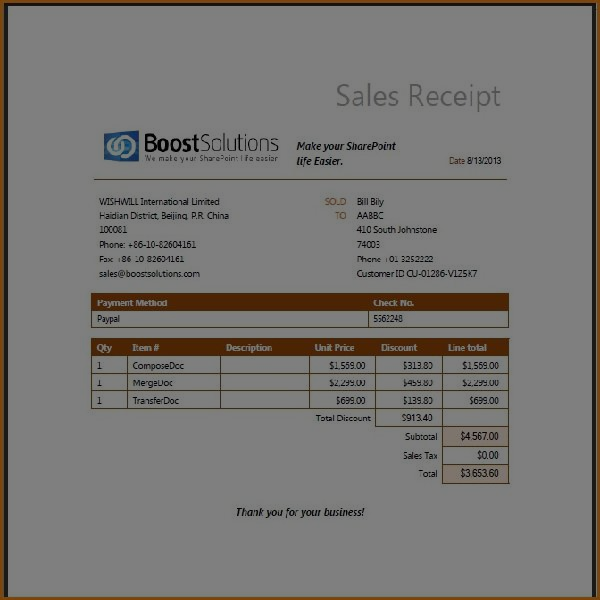

In [12]:
from PIL import Image, ImageEnhance
output_path2 = 'jpg_invoices/labeled_images/'
jpg_list = sorted(glob.glob1(output_path2,"*.jpg"))

#read the image
im = Image.open(output_path2+jpg_list[0])

#brightens the image
factor = 0.5
enhancer = ImageEnhance.Brightness(im)
im_output = enhancer.enhance(factor)
im_output

# 4) Augment labelled images

In [23]:
import lxml.etree
from PIL import Image, ImageEnhance

output_path2 = 'jpg_invoices/labeled_images/'
output_path3 = 'jpg_invoices/augmented_images/'
output_path4 = 'jpg_invoices/selected_images/'

!mkdir jpg_invoices/augmented_images/
xml_list = sorted(glob.glob1(output_path2,"*.xml"))

k = 0

for i in tqdm(range(len(xml_list))):
    img = Image.open(output_path2+xml_list[i][:-4]+'.jpg')
    img.save(output_path3 + 'image_' + str(i).zfill(3) + ".jpg", 'JPEG')
    tree = lxml.etree.parse(output_path2 +xml_list[i])  
    root = tree.getroot()
    for member in root.findall('object'):
            root.find('filename').text = 'image_' + str(i).zfill(3) + ".jpg"
    tree.write(output_path3+ 'image_' + str(i).zfill(3) + ".xml")
    l = 0.3
    
    # augment by image brightness
    for j in range(4):
        factor = 0.5 + l 
        enhancer = ImageEnhance.Brightness(img)
        im_output = enhancer.enhance(factor)
        im_output.save(output_path3 + 'image_' + str(i).zfill(3) + '_brightness_' + str(k).zfill(3) + ".jpg", 'JPEG')
        for member in root.findall('object'):
            root.find('filename').text = 'image_' + str(i).zfill(3) + '_brightness_' + str(k).zfill(3) + ".jpg"
        tree.write(output_path3+ 'image_' + str(k).zfill(3) + '_brightness_' + str(k).zfill(3) + ".xml")
        k+=1
        l+=0.3
    
    # augment by image contrast
    l = 0.3    
    for j in range(4):
        factor = 0.5 + l 
        enhancer = ImageEnhance.Contrast(img)
        im_output = enhancer.enhance(factor)
        im_output.save(output_path3 + 'image_' + str(i).zfill(3) + '_contrast_' + str(k).zfill(3) + ".jpg", 'JPEG')
        for member in root.findall('object'):
            root.find('filename').text = 'image_' + str(i).zfill(3) + '_contrast_' + str(k).zfill(3) + ".jpg"
        tree.write(output_path3+ 'image_' + str(i).zfill(3) + '_contrast_' + str(k).zfill(3) + ".xml")
        k+=1
        l+=0.3
        
    # augment by image sharpness
    l = 0   
    for j in range(4):
        factor = 0.05 + l 
        enhancer = ImageEnhance.Sharpness(img)
        im_output = enhancer.enhance(factor)
        im_output.save(output_path3 + 'image_' + str(i).zfill(3) + '_sharpness_' + str(k).zfill(3) + ".jpg", 'JPEG')
        for member in root.findall('object'):
            root.find('filename').text = 'image_' + str(i).zfill(3) + '_sharpness_' + str(k).zfill(3) + ".jpg"
        tree.write(output_path3+ 'image_' + str(i).zfill(3) + '_sharpness_' + str(k).zfill(3) + ".xml")
        k+=1
        l+=0.5
        
total_image = sorted(glob.glob1(output_path3,"*.jpg"))
total_xml   = sorted(glob.glob1(output_path3,"*.xml"))
print("\nThere are " + str(len(total_image)) + " images after augmentation")

!mkdir jpg_invoices/selected_images/

for i in tqdm(range(len(total_image))):
    img = Image.open(output_path3+total_image[i][:-4]+'.jpg')
    img.save(output_path4 +total_image[i], 'JPEG')

print("\nSuccessfully select " + str(len(total_image)) + " images only for model training")

100%|██████████| 61/61 [00:08<00:00,  7.29it/s]


There are 793 images after augmentation



100%|██████████| 793/793 [00:04<00:00, 180.08it/s]


Successfully select 793 images only for model training


In [29]:
%%bash

mv jpg_invoices/selected_images jpg_invoices/train
cd jpg_invoices
zip -r train.zip train/

  adding: train/ (stored 0%)
  adding: train/image_059_brightness_711.jpg (deflated 16%)
  adding: train/image_054_sharpness_659.jpg (deflated 21%)
  adding: train/image_051_brightness_614.jpg (deflated 49%)
  adding: train/image_018_sharpness_226.jpg (deflated 14%)
  adding: train/image_005_brightness_060.jpg (deflated 28%)
  adding: train/image_028_brightness_338.jpg (deflated 27%)
  adding: train/image_005.jpg (deflated 27%)
  adding: train/image_020_contrast_247.jpg (deflated 22%)
  adding: train/image_026_sharpness_320.jpg (deflated 20%)
  adding: train/image_059_contrast_715.jpg (deflated 9%)
  adding: train/image_012_contrast_150.jpg (deflated 42%)
  adding: train/image_012_brightness_145.jpg (deflated 43%)
  adding: train/image_047_brightness_564.jpg (deflated 14%)
  adding: train/image_023.jpg (deflated 17%)
  adding: train/image_011_sharpness_141.jpg (deflated 30%)
  adding: train/image_007_sharpness_094.jpg (deflated 28%)
  adding: train/image_034_contrast_415.jpg (deflated 

# 4) Convert XML to CSV files

In [30]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(input_path, output_path):
    xml_list = []
    for xml_file in glob.glob(input_path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    xml_df.to_csv(output_path + 'labels.csv', index=None)
    return xml_df

input_path = 'jpg_invoices/augmented_images/'
output_path = 'jpg_invoices/'
xml_to_csv(input_path , output_path)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,image_040_brightness_482.jpg,600,600,Logo,344,34,563,67
1,image_040_brightness_482.jpg,600,600,Date,439,81,560,96
2,image_040_brightness_482.jpg,600,600,Company_Details,35,126,436,241
3,image_040_brightness_482.jpg,600,600,Table,34,246,566,339
4,image_040_brightness_482.jpg,600,600,Subtotal,495,351,562,366
...,...,...,...,...,...,...,...,...
5114,image_050_sharpness_609.jpg,600,600,Company_Details,394,144,552,197
5115,image_050_sharpness_609.jpg,600,600,Table,46,201,553,361
5116,image_050_sharpness_609.jpg,600,600,Subtotal,498,364,553,379
5117,image_050_sharpness_609.jpg,600,600,Sales_Tax,498,389,555,404
